In [1]:
import numpy as np
import pandas as pd
from os import getcwd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler

getcwd()

'c:\\Users\\vicky\\Downloads\\project_04-main\\project_04-main\\depreciated_ipynb'

In [2]:
df = pd.read_csv('cleaned_sedan_data.csv')

In [3]:
df.head()

,vf_BodyClass,vf_Make,vf_Model,vf_ModelID,vf_ModelYear,mileage,askPrice,msrp,color,vf_BodyCabType,vf_Doors,vf_EngineCylinders,vf_EngineHP,vf_FuelTypePrimary,vf_TransmissionStyle,vin
0,Sedan/Saloon,HONDA,Accord,1861.0,2011.0,66253,0,0,Dark Amber Metallic,Not Applicable,4.0,4.0,177.0,Gasoline,Automatic,17db7a4f0262c5312dbc4f00c126e02dcaac8a17f81a6d...
1,Sedan/Saloon,HONDA,Civic,1863.0,2014.0,81493,0,0,Black,Not Applicable,4.0,4.0,205.0,Gasoline,Manual/Standard,a9a44eb9d5b82470cdf9692f33597cf8b2d33868a0a537...
2,Sedan/Saloon,CHEVROLET,Malibu,1834.0,2012.0,79232,0,0,Black Granite Metallic,Not Applicable,4.0,4.0,NaN,Gasoline,Automatic,4a402fc8181916a7fdddeb00509bbd14a278d29265b046...
3,Sedan/Saloon,CHEVROLET,Malibu,1834.0,2017.0,23056,0,0,Cajun Red Tintcoat,Not Applicable,4.0,4.0,NaN,Gasoline,Automatic,88c484edf48234c4e6d824ae18320de19c7bcb00bdecec...
4,Sedan/Saloon,FORD,Fiesta,3267.0,2015.0,31793,0,0,Tuxedo Black,Not Applicable,4.0,4.0,120.0,Flexible Fuel Vehicle (FFV),Automatic,c96cfc665d912be3a39b4dc3126faa11dd2f9e589b849c...


In [4]:
df = df.rename(columns={
 'vf_BodyClass': 'BodyClass',
 'vf_Make': 'Make',
 'vf_Model': 'Model',
 'vf_ModelID': 'ModelID',
 'vf_ModelYear': 'ModelYear',
 'mileage': 'mileage',
 'askPrice': 'askprice',
 'msrp': 'msrp',
 'color': 'color',
 'vf_BodyCabType': 'BodyCabType',
 'vf_Doors': 'Doors',
 'vf_EngineCylinders': 'EngineCylinders',
 'vf_EngineHP': 'EngineHP',
 'vf_FuelTypePrimary': 'FuelTypePrimary',
 'vf_TransmissionStyle': 'TransmissionStyle',
 'vin': 'vin',
})

In [5]:
df = df.loc[df['askprice'] != 0]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505058 entries, 18 to 613305
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   BodyClass          505058 non-null  object 
 1   Make               505058 non-null  object 
 2   Model              504998 non-null  object 
 3   ModelID            504998 non-null  float64
 4   ModelYear          505058 non-null  float64
 5   mileage            505058 non-null  int64  
 6   askprice           505058 non-null  int64  
 7   msrp               505058 non-null  int64  
 8   color              490521 non-null  object 
 9   BodyCabType        504974 non-null  object 
 10  Doors              503632 non-null  float64
 11  EngineCylinders    460464 non-null  float64
 12  EngineHP           286070 non-null  float64
 13  FuelTypePrimary    505058 non-null  object 
 14  TransmissionStyle  505058 non-null  object 
 15  vin                505058 non-null  object 
dtypes

In [8]:
df = df.drop(columns=['EngineHP',
                      'msrp',
                      'BodyClass',
                      'vin',
                      'BodyCabType',
                      'color',
                      'TransmissionStyle',
                      'Make',
                      'Model',
                      'Doors',
                      'EngineCylinders',
                      'FuelTypePrimary',
                     ])

KeyError: "['EngineHP' 'msrp' 'BodyClass' 'vin' 'BodyCabType' 'color'\n 'TransmissionStyle' 'Make' 'Model' 'Doors' 'EngineCylinders'\n 'FuelTypePrimary'] not found in axis"

In [9]:
df.head()

,ModelID,ModelYear,mileage,askprice
18,1782.0,2015.0,67588,16462
31,3678.0,2015.0,32990,59962
46,1878.0,2017.0,9231,23962
50,1790.0,2016.0,19710,22962
53,3267.0,2011.0,92053,5962


In [10]:
df.count()

ModelID      504998
ModelYear    505058
mileage      505058
askprice     505058
dtype: int64

In [11]:
df = df.dropna(how='any')

In [12]:
df.count()

ModelID      504998
ModelYear    504998
mileage      504998
askprice     504998
dtype: int64

In [27]:
df_sample = df.sample(n=50000,random_state = 42)

In [42]:
X = df.drop(columns=['askprice'])
y = df['askprice']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [44]:
X_train_dummies = pd.get_dummies(X_train,drop_first=True)

In [45]:
X_test_dummies = pd.get_dummies(X_test,drop_first=True)

In [46]:
# compare columns in Dataframes
print(f'number of Test_dummies columns -> {len(X_test_dummies.columns)} ')
print(f'number of Train_dummies columns -> {len(X_train_dummies.columns)} ')

number of Test_dummies columns -> 3 
number of Train_dummies columns -> 3 


In [47]:
# add missing dummy variables to testing set 

missing_col = []
for col in X_train_dummies.columns:
    if col not in X_test_dummies:
        missing_col.append(col)
        X_test_dummies[col] = 0
missing_col

[]

In [48]:
# compare columns in Dataframes
print(f'number of Test_dummies columns -> {len(X_test_dummies.columns)} ')
print(f'number of Train_dummies columns -> {len(X_train_dummies.columns)} ')

number of Test_dummies columns -> 3 
number of Train_dummies columns -> 3 


In [49]:
missing_col = [] 
for col in X_test_dummies.columns:
    if col not in X_train_dummies:
        missing_col.append(col)
        X_train_dummies[col] = 0
missing_col

[]

In [50]:
# compare columns in Dataframes
print(f'number of Test_dummies columns -> {len(X_test_dummies.columns)} ')
print(f'number of Train_dummies columns -> {len(X_train_dummies.columns)} ')

number of Test_dummies columns -> 3 
number of Train_dummies columns -> 3 


In [51]:
# Create a StandardScaler() model and fit it to the training data

X_scaler = StandardScaler().fit(X_train_dummies)

In [52]:
 # Transform the training and testing data by using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train_dummies)
X_test_scaled = X_scaler.transform(X_test_dummies)

k: 1, Train/Test Score: 0.959/0.770
k: 3, Train/Test Score: 0.817/0.594
k: 5, Train/Test Score: 0.678/0.498
k: 7, Train/Test Score: 0.583/0.434
k: 9, Train/Test Score: 0.510/0.377
k: 11, Train/Test Score: 0.451/0.327
k: 13, Train/Test Score: 0.403/0.285
k: 15, Train/Test Score: 0.362/0.252
k: 17, Train/Test Score: 0.330/0.225
k: 19, Train/Test Score: 0.304/0.203


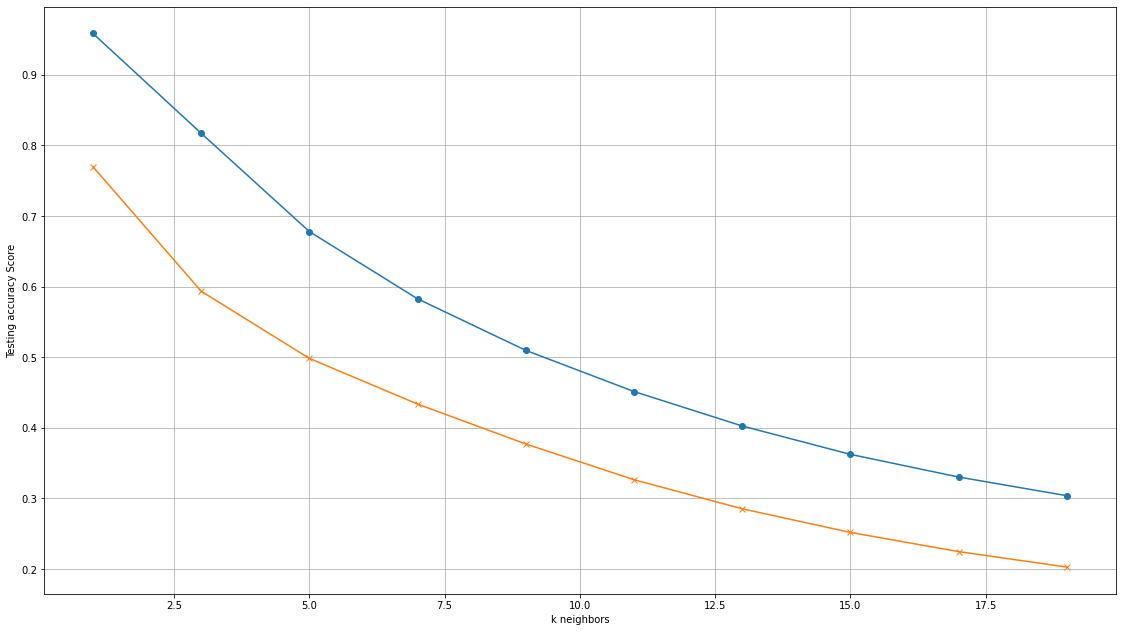

In [53]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

fig = plt.figure(figsize = (19.20,10.80))

plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.grid()
plt.show()

In [54]:
 # Note that k: 5 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=3 Test Acc: 0.594
